In [74]:
#Bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [75]:
dados = pd.read_csv('/content/df_plano.csv')
df = pd.read_csv('/content/df_plano.csv')
dados.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

In [77]:
df.isna().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [78]:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

# ***Preparação dos Dados***

In [79]:
df = df.drop(columns=['customerID'], axis=1)

In [80]:
df_clean = df.copy()

# Etapa 1: Juntar "No internet service" with "No"
# Note: There might be a typo here, should it be "No internet services"?
cols_to_fix = ['internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup','internet.DeviceProtection',
       'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies'
       ]

for col in cols_to_fix:
       df_clean[col] = df_clean[col].replace({'No internet service': 'No'}) # Potential typo: service vs services

# Etapa 2: One-Hot Encoding (sm Dummy Trap)

categorical_cols = [
    "Churn", "customer.gender", "customer.Partner", "customer.Dependents",
    "phone.PhoneService", "phone.MultipleLines", "internet.InternetService",
    "internet.OnlineSecurity", "internet.OnlineBackup",
    "internet.DeviceProtection", "internet.TechSupport",
    "internet.StreamingTV", "internet.StreamingMovies",
    "account.Contract", "account.PaperlessBilling", "account.PaymentMethod"
]

df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

In [81]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7043 non-null   int64  
 1   customer.tenure                                7043 non-null   int64  
 2   Total.Day                                      7032 non-null   float64
 3   account.Charges.Monthly                        7043 non-null   float64
 4   account.Charges.Total                          7032 non-null   float64
 5   Churn_Yes                                      7043 non-null   bool   
 6   customer.gender_Male                           7043 non-null   bool   
 7   customer.Partner_Yes                           7043 non-null   bool   
 8   customer.Dependents_Yes                        7043 non-null   bool   
 9   phone.PhoneService_Yes                         7043 

In [82]:
df_encoded.isna().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,11
account.Charges.Monthly,0
account.Charges.Total,11
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


In [83]:
print(df_encoded[['Total.Day', 'account.Charges.Total']].isnull().sum())

Total.Day                11
account.Charges.Total    11
dtype: int64


In [84]:
df_encoded = df_encoded.dropna(subset=['Total.Day', 'account.Charges.Total'])

In [85]:
df_encoded.isna().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,0
account.Charges.Monthly,0
account.Charges.Total,0
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


In [86]:
from sklearn.preprocessing import MinMaxScaler

# Selecionando apenas colunas numéricas (exceto a variável target, se já estiver separada)
colunas_numericas = dados.select_dtypes(include=['int64', 'float64']).columns

# Inicializando o scaler
scaler = MinMaxScaler()

# Aplicando a normalização
dados[colunas_numericas] = scaler.fit_transform(dados[colunas_numericas])

# Exibindo os dados normalizados
dados.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0.0,Yes,Yes,0.125000,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,0.484680,0.471144,0.066294
1,0003-MKNFE,No,Male,0.0,No,No,0.125000,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,0.431755,0.414428,0.060420
2,0004-TLHLJ,Yes,Male,0.0,No,No,0.055556,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,0.523677,0.553731,0.030239
3,0011-IGKFF,Yes,Male,1.0,Yes,No,0.180556,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,0.754875,0.793532,0.140670
4,0013-EXCHZ,Yes,Female,1.0,Yes,No,0.041667,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,0.699164,0.653234,0.028687


# 🎯***Correlação e Seleção de Variáveis***

In [87]:
corr = df_encoded.corr()

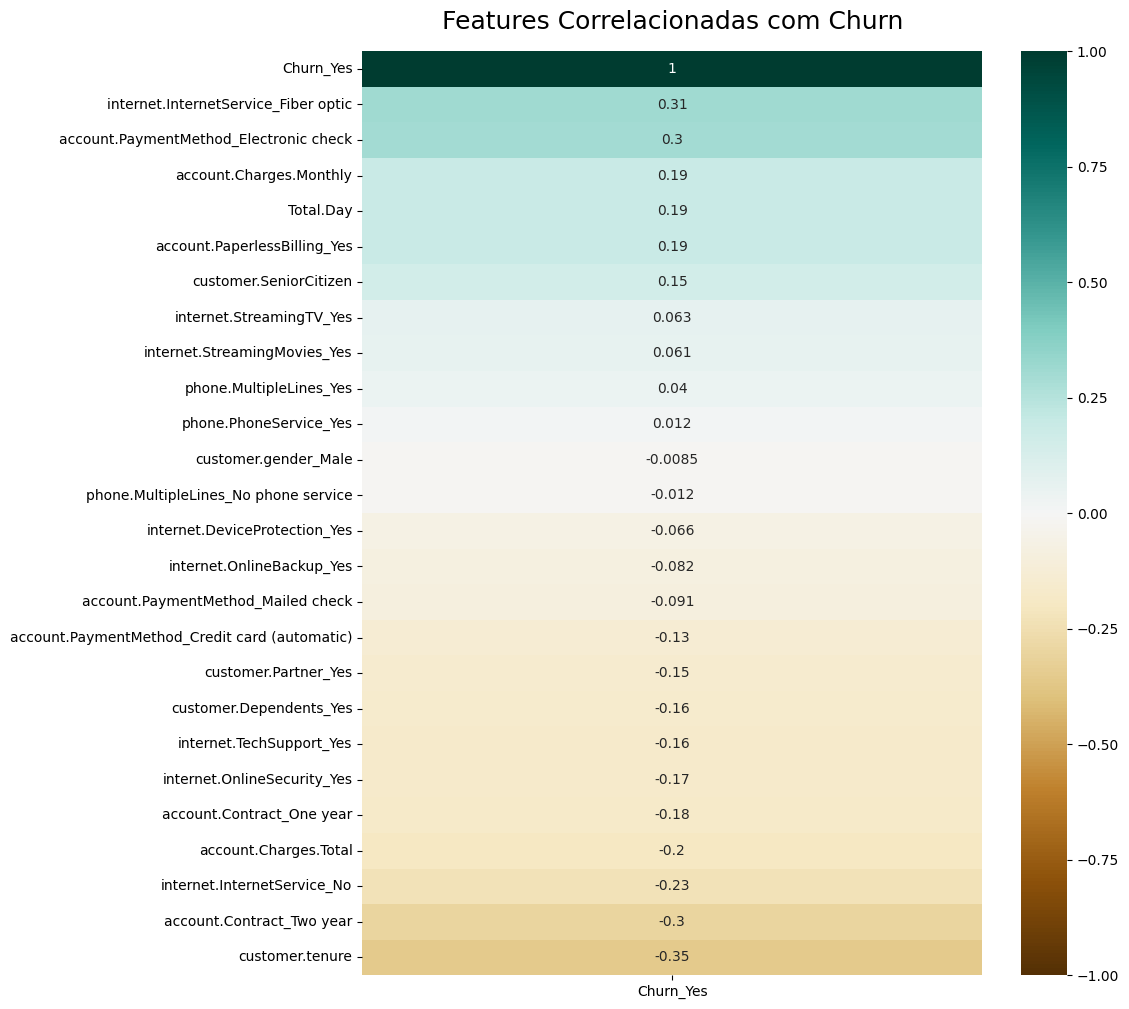

In [88]:
plt.figure(figsize=(10, 12))
# Calcula a matriz de correlação do DataFrame e filtra para mostrar apenas as correlações com 'Churn_Yes'.
# Ordena os valores para visualizar facilmente os fatores mais correlacionados (positiva ou negativamente).
heatmap = sns.heatmap(
    df_encoded.corr(numeric_only=True)[['Churn_Yes']].sort_values(by='Churn_Yes', ascending=False),
    vmin=-1, vmax=1, annot=True, cmap='BrBG'
)

heatmap.set_title('Features Correlacionadas com Churn', fontdict={'fontsize':18}, pad=16);

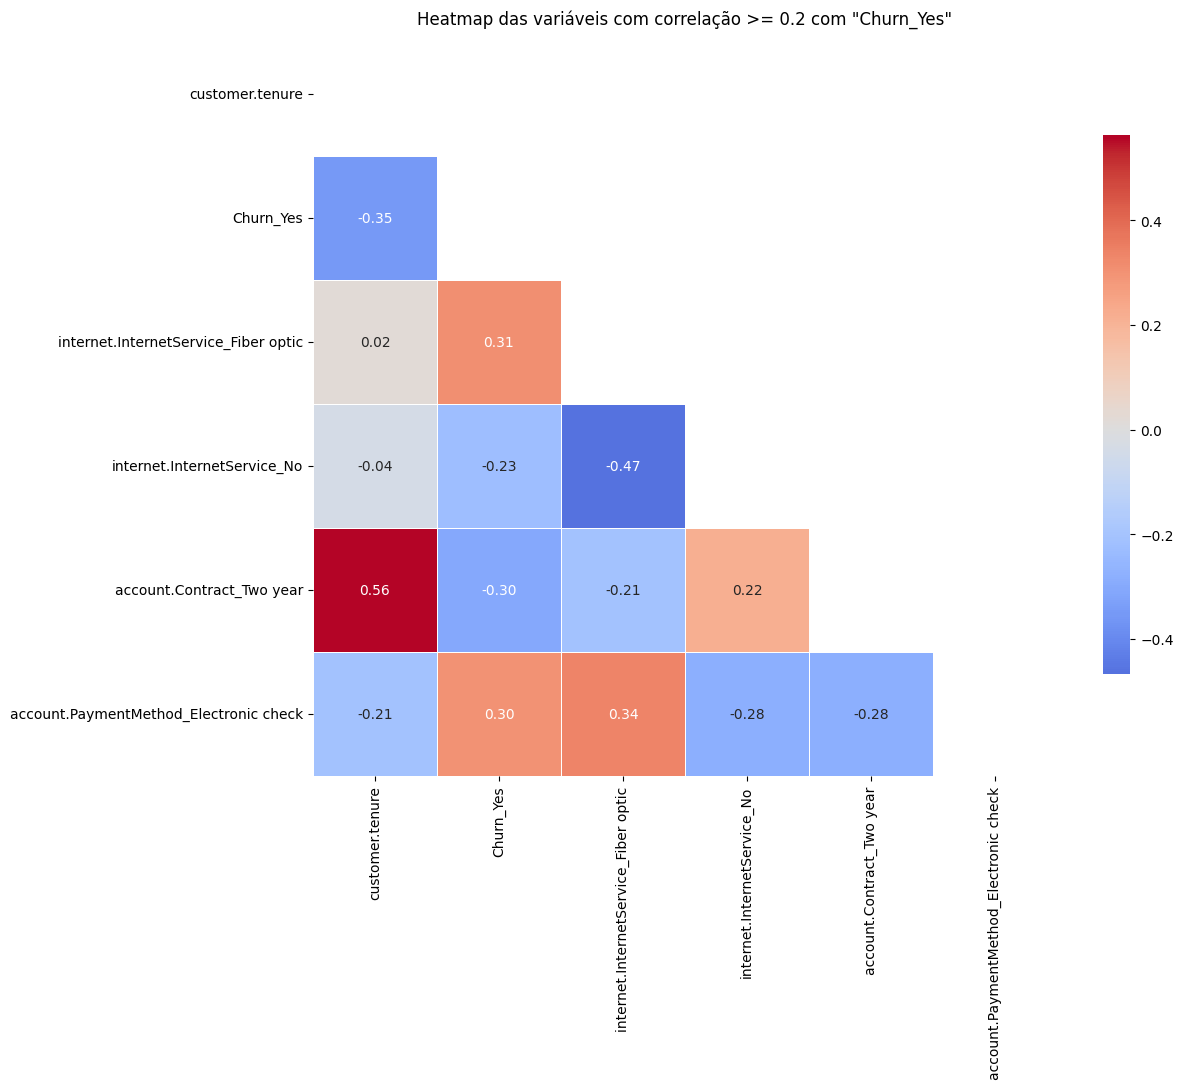

In [89]:
target_var = 'Churn_Yes'

# Definir o limiar mínimo de correlação absoluta para seleção
limiar = 0.2

# Filtrar variáveis que tenham correlação absoluta >= limiar com a variável alvo
# Isso cria uma lista com as variáveis relevantes
variaveis_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()

# Garantir que a variável alvo está na lista (se não estiver, adiciona)
if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

# Criar uma matriz de correlação somente com as variáveis selecionadas
corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]

# Gerar uma máscara para esconder o triângulo superior da matriz (incluindo diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Plotar o heatmap com a máscara aplicada para melhor visualização
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap das variáveis com correlação >= {limiar} com "{target_var}"')
plt.show()

# *Análise de Multicolinearidade*

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [91]:
X = df_encoded.drop(columns=['Churn_Yes'], axis=1)

In [92]:
X_const = add_constant(X)

In [93]:
# Ensure data type is float
X_const = X_const.astype(float)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
vif_data['Features'] = X_const.columns

# Display VIF data
display(vif_data.sort_values(by='VIF', ascending=False))

,VIF,Features
9,inf,phone.PhoneService_Yes
10,inf,phone.MultipleLines_No phone service
4,992.623632,account.Charges.Monthly
12,148.504277,internet.InternetService_Fiber optic
3,133.792125,Total.Day
13,104.217179,internet.InternetService_No
19,24.158588,internet.StreamingMovies_Yes
18,24.080021,internet.StreamingTV_Yes
5,10.871350,account.Charges.Total
2,7.613525,customer.tenure


FIV RECEITA

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


X_filtered = X_const.copy()

cols_to_drop = [
    "phone.PhoneService_Yes",
    "phone.MultipleLines_No phone service",
]
X_filtered.drop(columns=cols_to_drop, inplace=True)

# Ensure data type is float
X_filtered = X_filtered.astype(float)

vif_data = pd.DataFrame()
vif_data['VIF'] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]
# Assign the column names, not the DataFrame itself
vif_data['Features'] = X_filtered.columns

display(vif_data.sort_values(by='VIF', ascending=False))

,VIF,Features
4,166.710928,account.Charges.Monthly
3,133.784800,Total.Day
0,82.412224,const
5,10.870772,account.Charges.Total
10,10.116143,internet.InternetService_Fiber optic
2,7.613389,customer.tenure
11,4.845893,internet.InternetService_No
19,2.652235,account.Contract_Two year
16,2.456060,internet.StreamingTV_Yes
17,2.434172,internet.StreamingMovies_Yes


*FIV2

In [95]:

X_final = X_filtered.drop(columns=['account.Charges.Total'])

#Recalcular o VIF
vif_final = pd.DataFrame()
vif_final['VIF'] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]
vif_final['Features'] = X_final.columns

display(vif_final.sort_values(by='VIF', ascending=False))

,VIF,Features
4,166.471142,account.Charges.Monthly
3,133.049143,Total.Day
0,71.633503,const
9,10.110404,internet.InternetService_Fiber optic
10,4.799919,internet.InternetService_No
2,2.826925,customer.tenure
18,2.633106,account.Contract_Two year
15,2.446240,internet.StreamingTV_Yes
16,2.423270,internet.StreamingMovies_Yes
21,1.973979,account.PaymentMethod_Electronic check


# 🤖 ***Modelagem Preditiva***

In [96]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier

 Separar features e target

In [97]:
X = df_encoded.drop(columns=['Churn_Yes'], axis=1)
y = df_encoded['Churn_Yes']

Dividir treino e teste

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



Normalizar

- Vamos treinar Regressão Logística, que se beneficia da normalização. Por isso, normalizei os dados para esse modelo.

- Já o Random Forest não precisa da normalização — mas como você está usando os mesmos dados para ambos os modelos, o normalizei para manter consistência e simplicidade.



In [99]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Balancear treino com SMOTE

Pois ja verificamos anterioemente que a proporção do churn estava desbalanceada


In [100]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

**Regressão Logística**

In [101]:
lr = LogisticRegression()
lr.fit(X_train_bal, y_train_bal)

 #Previsões
y_pred = lr.predict(X_test_scaled)
y_prob = lr.predict_proba(X_test_scaled)[:, 1]

 #Avaliações
print("Regressão Logística")
print("Acurácia:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Regressão Logística
Acurácia: 0.7502369668246446
ROC AUC: 0.8453628296790868
Matriz de Confusão:
 [[1129  420]
 [ 107  454]]
              precision    recall  f1-score   support

       False       0.91      0.73      0.81      1549
        True       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110



# ***Random Forest***

In [102]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Previsões
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Avaliação
print("Random Forest")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Acurácia: 0.7786729857819905
ROC AUC: 0.8241588788810905
Matriz de Confusão:
 [[1307  242]
 [ 225  336]]
              precision    recall  f1-score   support

       False       0.85      0.84      0.85      1549
        True       0.58      0.60      0.59       561

    accuracy                           0.78      2110
   macro avg       0.72      0.72      0.72      2110
weighted avg       0.78      0.78      0.78      2110



Conclusão: Entendendo e Combatendo a Evasão de Clientes

Nossa análise e modelos preditivos revelaram os principais motores da evasão de clientes. Identificar esses fatores é o primeiro passo crucial para reter seus clientes valiosos.
🔑 Fatores Chave de Evasão

Os elementos que mais influenciam um cliente a sair são:

    ⏱️ Tempo de Permanência Curto (Low Tenure): Novos clientes são mais propensos a evadir. Os primeiros meses são decisivos!
    📄 Contratos Flexíveis (Mensal): Clientes sem compromisso de longo prazo têm maior liberdade (e propensão) para sair.
    ⚡ Serviço de Fibra Ótica: Surpreendentemente, clientes de fibra ótica mostram maior tendência a evadir. Precisamos investigar o porquê!
    💸 Custos Elevados (Mensal/Total): Contas mais altas frequentemente levam à insatisfação e à busca por alternativas mais baratas.
    💳 Forma de Pagamento (Cheque Eletrônico): Este método de pagamento está associado a uma maior taxa de evasão.

📈 Fatores que Aumentam a Evasão

    Clientes Recentes
    Contratos Mensais
    Serviço de Fibra Ótica
    Altas Contas (Mensal/Total)
    Pagamento via Cheque Eletrônico
    Não ter Serviços Adicionais (Segurança, Suporte, etc.)

📉 Fatores que Diminuem a Evasão

    Clientes de Longa Data
    Contratos de 1 ou 2 Anos
    Adesão a Serviços Adicionais
    Baixas Contas (Mensal/Total)
    Não ter Serviço de Internet (Clientes básicos tendem a ficar)

🤖 Desempenho dos Modelos

    Regressão Logística: Bom em identificar clientes em risco (alto Recall), útil para campanhas de retenção direcionadas.
    Random Forest: Ligeiramente melhor na previsão geral (Acurácia), mas identifica menos clientes em risco (menor Recall).

Ambos os modelos concordam amplamente sobre os fatores mais importantes.
🛡️ Estratégias de Retenção (Ação!)

Baseado nesses insights, foque em:

    🤝 Cativar Novos Clientes: Programa de boas-vindas forte, suporte proativo nos primeiros meses.
    🔒 Incentivar Contratos Longos: Ofereça benefícios para quem se compromete por 1-2 anos.
    🔬 Investigar Fibra Ótica & Cheque Eletrônico: Entenda as dores desses clientes e resolva os problemas.
    💰 Gerenciar Custos: Ajude clientes com contas altas a encontrar planos adequados ou ofereça recompensas por lealdade.
    ➕ Promover Serviços Adicionais: Mostre o valor da segurança e conveniência para aumentar o engajamento.
    🎯 Usar Modelos para Identificar Riscos: Direcione suas melhores ofertas de retenção para os clientes com maior probabilidade de evasão, identificados pelos modelos.

Ao focar nesses pontos, sua empresa pode reduzir significativamente a taxa de evasão e construir relacionamentos mais duradouros com os clientes.